
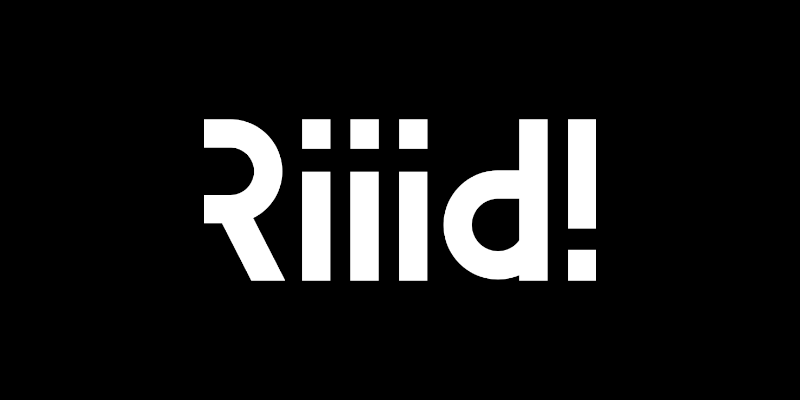


Riiid is a company whose goal is to imporve quality of education using AI.

Riiid wants to make persnolised education better for every student using AI.

Riiid Labs, an AI solutions provider delivering creative disruption to the education market, empowers global education players to rethink traditional ways of learning leveraging AI. With a strong belief in equal opportunity in education, Riiid launched an AI tutor based on deep-learning algorithms in 2017 that attracted more than one million South Korean students. This year, the company released EdNet, the world’s largest open database for AI education containing more than 100 million student interactions.



In this competition, your challenge is to create algorithms for "Knowledge Tracing," the modeling of student knowledge over time. The goal is to accurately predict how students will perform on future interactions. we will pair your machine learning skills using Riiid’s EdNet data.


Overview of the dataset

In [ ]:
import os
os.environ['KAGGLE_USERNAME']='karanchoudhary103'
os.environ['KAGGLE_KEY']='3e84e0a4f94d7b95f0e24ff242c5aa45'

In [ ]:
#Api command to load data in colab from kaggle
! kaggle competitions download -c riiid-test-answer-prediction

In [ ]:
#unzipping the train.csv file  and rest of the files are unziped
! unzip train.csv.zip

In [ ]:
#importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#reading the data train.csv,questions.csv,lectures.csv
data=pd.read_csv('train.csv',nrows=10000000)

In [ ]:
data.columns

In [42]:
data.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,0.0,False
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


In [ ]:
data.shape

In [ ]:
data.info()

In [10]:
#checking the null value in the dataset
data.isna().sum()

row_id                                 0
timestamp                              0
user_id                                0
content_id                             0
content_type_id                        0
task_container_id                      0
user_answer                            0
answered_correctly                     0
prior_question_elapsed_time       234784
prior_question_had_explanation     39388
dtype: int64

In [11]:
#finding the uique value in the dataset
data.nunique()

row_id                            10000000
timestamp                          7534842
user_id                              39491
content_id                           13749
content_type_id                          2
task_container_id                    10000
user_answer                              5
answered_correctly                       3
prior_question_elapsed_time           2583
prior_question_had_explanation           2
dtype: int64

In [12]:
data.describe().style.applymap(lambda x:"background-color:yellow")

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,10000000.000000,10000000.000000,10000000.000000,10000000.000000,10000000.000000,10000000.000000,10000000.000000,10000000.000000,9765216.000000
mean,4999999.500000,7546528145.518233,107994307.702982,5209.509495,0.019540,877.619370,1.376462,0.626203,25475.594466
std,2886751.490286,11413809047.538729,63110239.544377,3867.782806,0.138412,1334.406605,1.193603,0.522640,19950.326243
min,0.000000,0.000000,115.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000
25%,2499999.750000,510959981.000000,53981772.000000,2059.000000,0.000000,102.000000,0.000000,0.000000,16000.000000
50%,4999999.500000,2612310025.500000,106763796.000000,5016.000000,0.000000,371.000000,1.000000,1.000000,21000.000000
75%,7499999.250000,9751909194.250000,163073451.000000,7402.000000,0.000000,1055.000000,3.000000,1.000000,29666.000000
max,9999999.000000,84708159208.000000,216747867.000000,32736.000000,1.000000,9999.000000,3.000000,1.000000,300000.000000


CORRELATION PLOT  
 --finding the correlation between independent variables

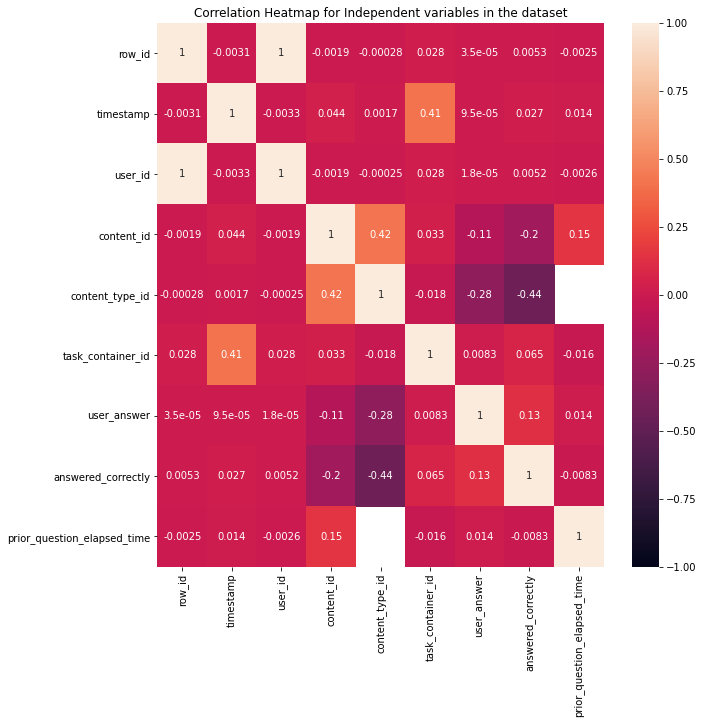

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap for Independent variables in the dataset', fontdict={'fontsize':12}); #scale of -1 to +1

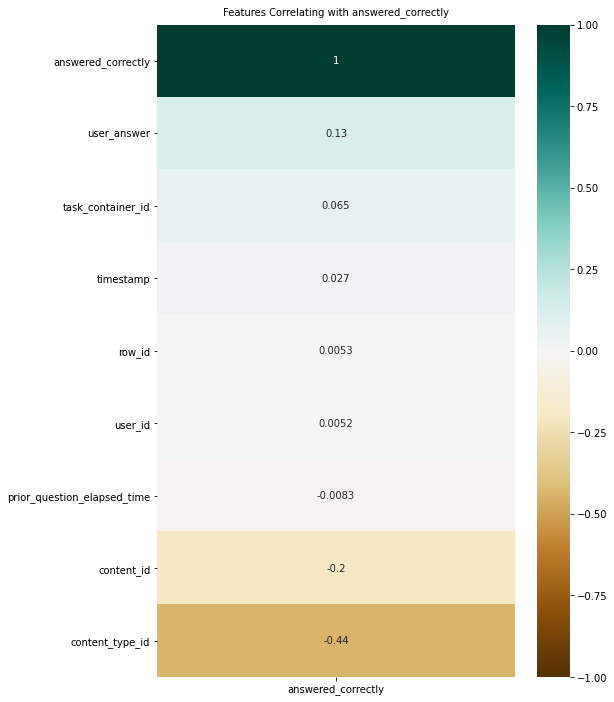

In [14]:
import seaborn as sns
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data.corr()[['answered_correctly']].sort_values(by='answered_correctly', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with answered_correctly', fontdict={'fontsize':10}, pad=10);  #min and  max value [-1, +1]

In [15]:
import numpy as np
data['prior_question_had_explanation'] = data['prior_question_had_explanation'].replace(np.nan, data['prior_question_had_explanation'].mean)
data['prior_question_elapsed_time'] = data['prior_question_elapsed_time'].replace(np.nan,(False))
data.isna().sum()

row_id                            0
timestamp                         0
user_id                           0
content_id                        0
content_type_id                   0
task_container_id                 0
user_answer                       0
answered_correctly                0
prior_question_elapsed_time       0
prior_question_had_explanation    0
dtype: int64

Checking the datatypes of the columns

In [16]:
data.dtypes

row_id                              int64
timestamp                           int64
user_id                             int64
content_id                          int64
content_type_id                     int64
task_container_id                   int64
user_answer                         int64
answered_correctly                  int64
prior_question_elapsed_time       float64
prior_question_had_explanation     object
dtype: object

In [17]:
#to make the entire data in int and bool
data['prior_question_had_explanation'] = data['prior_question_had_explanation'].astype('bool')
data['prior_question_had_explanation'].dtypes

dtype('bool')

In [18]:
#find the if thier is any null or any other vallue other than 0 and 1
print('Unique value of content_type_id -> \t',data.content_type_id.unique())
print('count of unique value 0 and 1 are->\n',data.content_type_id.value_counts())    #to see the lectures(1) attend and the question asked

Unique value of content_type_id -> 	 [0 1]
count of unique value 0 and 1 are->
 0    9804604
1     195396
Name: content_type_id, dtype: int64


In [19]:
#TARGET VARIABLE ANSERED CORRECTLY
#-1 lecture
# 0 incorrect 
# 1 is correct
print(data.answered_correctly.value_counts())

 1    6457425
 0    3347179
-1     195396
Name: answered_correctly, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


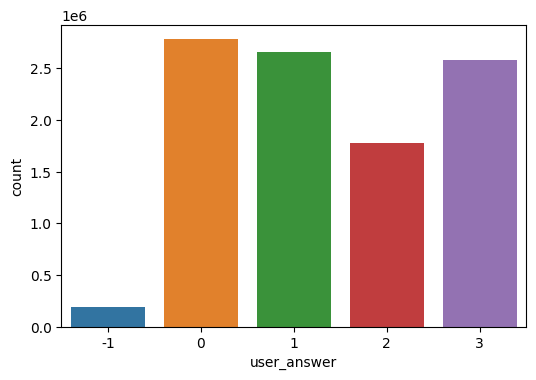

In [20]:
def countplot(column):
    plt.figure(dpi=100)
    sns.countplot(data[column])
    plt.show()
countplot('user_answer')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


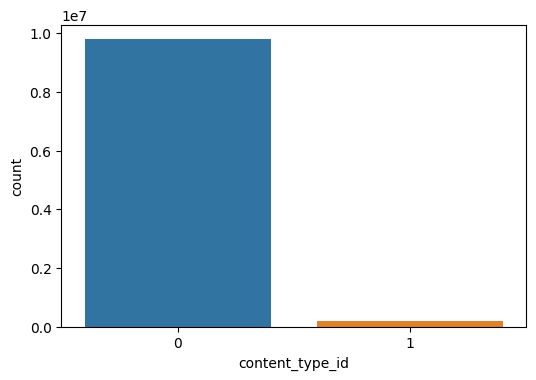

In [21]:
countplot('content_type_id')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


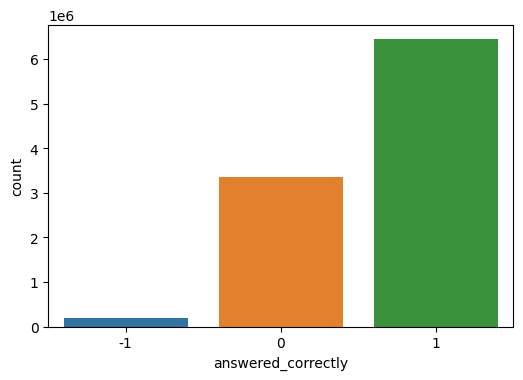

In [26]:
countplot('answered_correctly')

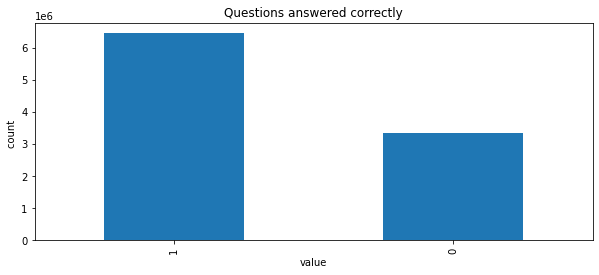

In [27]:
#plot graph of target variable
import matplotlib.pyplot as plt
correct = data[data.answered_correctly != -1].answered_correctly.value_counts()

fig = plt.figure(figsize=(10,4))
correct.plot.bar()
plt.title("Questions answered correctly")
plt.ylabel('count ')
plt.xlabel('value')
plt.show()

<Figure size 864x288 with 0 Axes>

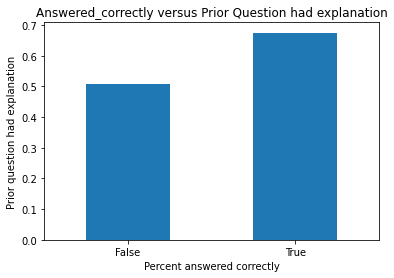

In [110]:
pq = data[data.answered_correctly != -1].groupby(['prior_question_had_explanation']).agg({'answered_correctly': ['mean']})
fig = plt.figure(figsize=(12,4))
pq.plot.bar(legend=None)
plt.title("Answered_correctly versus Prior Question had explanation")
plt.xlabel("Percent answered correctly")
plt.ylabel("Prior question had explanation")
plt.xticks(rotation=0)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f84944970f0>,
      dtype=object)

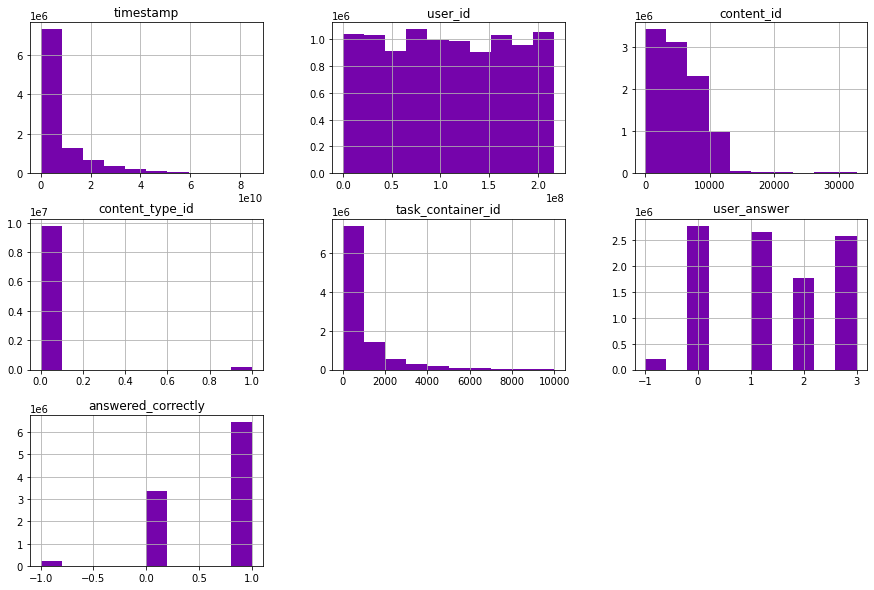

In [28]:
data[([ 'timestamp', 'user_id', 'content_id', 'content_type_id',
       'task_container_id', 'user_answer', 'answered_correctly'])].hist(figsize=(15,10),color="#7504ab")
      

In [30]:
data.columns

Index(['row_id', 'timestamp', 'user_id', 'content_id', 'content_type_id',
       'task_container_id', 'user_answer', 'answered_correctly',
       'prior_question_elapsed_time', 'prior_question_had_explanation'],
      dtype='object')

In [31]:
# row id ,timestamp user_id ,task_container_id  are not important columns of our target variable in the dataset

In [32]:
''' now we will be implementing algorithm based in the columns prior_question_elapsed_time,prior_question_had_explanation,
 and answered_correctly'''

In [33]:
#now we will be implementing algorithms and make prediction accordingly on based on decison tree ,naive bayes 


In [ ]:
''' now we will be implementing join operation on train.csv ,lectures.csv and questions.csv extracting the impotanat features and make model on it'''

 Now we will be implementing join operation on train.csv,lectures.csv and questions.csv extracting the important features and make model onit

In [44]:
#dataset loading
train_data=pd.read_csv('train.csv',nrows=10000000)
lectures = pd.read_csv('lectures.csv')
questions = pd.read_csv('questions.csv')

In [45]:
questions.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [43]:
lectures.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


Now we will performing merge functions on the tables

We will be selecting these coulmns and implement and form a model

question stats - question_success_rate, part_success_rate



user general stats - user_success_rate, user_part_success_rate, user_relative_success_rate, 


user current stats - lectures_watched, prior_question_elapsed_time, prior_question_had_explanation, prior_group_answers_correct


In [46]:
import numpy as np
user_general_stats = train_data[train_data['content_type_id']==0][['user_id', 'answered_correctly']].groupby('user_id').agg({'answered_correctly':
                                  ['count', np.sum]})
user_general_stats.columns = user_general_stats.columns.droplevel()
user_general_stats = user_general_stats.reset_index().rename(columns={'sum': 'correct_answers', 'count': 'total_questions'})
user_general_stats['user_success_rate'] = user_general_stats['correct_answers']/user_general_stats['total_questions']
user_general_stats = user_general_stats[['user_id', 'user_success_rate']]
user_general_stats.head()

,user_id,user_success_rate
0,115,0.695652
1,124,0.233333
2,2746,0.578947
3,5382,0.672000
4,8623,0.642202


In [52]:
question_stats = train_data[train_data['content_type_id']==0][['content_id', 'answered_correctly']].groupby('content_id').agg({'answered_correctly':
                                  ['count', np.sum]})
question_stats.columns = question_stats.columns.droplevel()
question_stats = question_stats.reset_index().rename(columns={'sum': 'correct_answers', 'count': 'total_questions'})
question_stats['question_success_rate'] = question_stats['correct_answers']/question_stats['total_questions']
question_stats = question_stats[['content_id', 'question_success_rate']]
question_stats.head()

,content_id,question_success_rate
0,0,0.908828
1,1,0.893939
2,2,0.562319
3,3,0.780316
4,4,0.627973


In [53]:
training = pd.merge(train_data[train_data['content_type_id']==0], user_general_stats, on='user_id', how='left')
training = pd.merge(training, question_stats, on='content_id', how='left')
training.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,user_success_rate,question_success_rate
0,0,0,115,5692,0,1,3,1,NaN,NaN,0.695652,0.741545
1,1,56943,115,5716,0,2,2,1,37000.0,False,0.695652,0.735690
2,2,118363,115,128,0,0,0,1,55000.0,False,0.695652,0.973877
3,3,131167,115,7860,0,3,0,1,19000.0,False,0.695652,0.955545
4,4,137965,115,7922,0,4,1,1,11000.0,False,0.695652,0.952609


In [59]:
final = training[['user_success_rate', 'question_success_rate', 'answered_correctly']]
final= final.groupby('answered_correctly').agg('mean').reset_index()
final

,answered_correctly,user_success_rate,question_success_rate
0,0,0.620693,0.568732
1,1,0.678266,0.705200


In [74]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense , Dropout

model = keras.Sequential()
model.add(Dense(16, input_shape=(2,), activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(8, activation='sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy']) #auc

In [75]:
X = training[['user_success_rate', 'question_success_rate']].values
y = training[['answered_correctly']].values
print(X.shape)
print(y.shape)


(9804604, 2)
(9804604, 1)


In [ ]:
model.fit(
  x=X,
  y=y,
  epochs=2
)

Epoch 1/2
145103/306394 [=============>................] - ETA: 2:52 - loss: 0.5922 - accuracy: 0.6890